# vector data using shapely and geopandas

## overview

Up to now, you have gained some experience working with basic features of python, and used cartopy and matplotlib to create a map. In each of these practicals, you have loaded different vector datasets using a module called geopandas. In this week's practical, we'll be looking at working vector data in a bit more depth, including the different geometry types available using shapely, analyses like spatial joins and summarizing based on attributes, and how to reproject vector data from one coordinate reference system to another.


## objectives
-  Gain experience working with different vector data types using shapely
-  Use geopandas to re-project vector datasets from one coordinate reference system to another
-  Learn about and used **vectorized** operations
-  Summarize features using the groupby method of a GeoDataFrame
-  Learn how to perform different vector data operations using geopandas and shapely

## data provided

In the data\_files folder, you should have the following:
-  **NI_roads.shp**, a shapefile of roads in Northern Ireland
-  **Counties.shp**, a shapefile of county outlines for Northern Ireland
-  **NI_Wards.shp**, a shapefile of electoral wards for Northern Ireland

## getting started

In this practical, we'll be working with vector data. As a quick refresher, the three main types of vector data that we will work with are:

-  **Point**: point data represent a single point in space. For our purposes, points are either two-dimensional (x, y) or three-dimensional (x, y, z). In `shapely`, the corresponding **class** of data is a **Point**.
-  **Line**: lines are a sequence of at least two points that are joined together. In `shapely`, the corresponding **class** of data is known as a **LineString**.
-  **Polygon**: polygons are a sequence of at least three points that are connected to form a **ring**, as well as any additional rings that represent holes in the polygon. In `shapely`, the corresponding **class** of data is a **Polygon**.

We can also have **Collections** of vector data, where each feature represents a collection of **Point**, **Line**, or **Polygon** objects. In `shapely`, these are represented as **MultiPoint**, **MultiLineString**, or **MultiPolygon** objects.

To get started, run the following cell to import `geopandas` and `shapely`.

In [1]:
# this lets us show the figures, but not interactively
%matplotlib inline

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

## shapely geometry types
### Points
As we saw in Week 1, to create a **Point**, we pass x, y (and optionally, z) coordinates to the **Point** class constructor ([documentation](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html)):

In [2]:
pt = Point(-6.677, 55.150) # creates a 2d point with coordinates -6.677, 55.150
pt2 = Point(-6.658, 55.213) # creates a 2d point with coordinates -6.658, 55.213

pt3d = Point(86.925278, 27.988056, 8848.86) # creates a 3d point

print(pt) # print a well-known text (WKT) representation of the Point object

POINT (-6.677 55.15)


The last line, `print(pt)`, prints a [well-known-text](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry) (WKT) representation of the **Point** object. WKT is a standard representation of vector geometry objects - most `python` libraries and GIS softwares are able to read and/or translate WKT into other formats, such as ESRI Shapefiles, GeoJSON, etc.

Remember that in python, we can find the attributes and methods for an object by looking up the documentation (for shapely, this can be found [here](https://shapely.readthedocs.io/en/stable/manual.html)), or using the built-in function `dir()`. To find out more about a particular function, we can use the built-in function `help()` (or, in jupyter notebooks/ipython, the `?` operator).

As an example, let's use the built-in function `dir()` to look at the methods and attributes associated with the __Point__ class:

In [3]:
dir(pt) # show the attributes and methods associated with the pt object

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__static_attributes__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'almost_equals',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_

Here, in addition to the **special** or **magic** methods (denoted with two underscores, \_\_, at the beginning and end of the method name), there are a number of methods that we might find useful, including `.distance()`. 

To see what this method does, we can use `help(Point.distance)`:

In [5]:
help(pt.distance)

Help on method distance in module shapely.geometry.base:

distance(other) method of shapely.geometry.point.Point instance
    Unitless distance to other geometry (float)



So, `.distance()` provides the distance from the **Point** object to some other geometry. Because `shapely` does not directly deal with coordinate systems, this distance is **unitless**. This means that **we have to make sure that the two objects have the same reference system - if we do not, the distance returned will not make sense.** Don't worry, we will cover working with coordinate reference systems later on in this exercise.

<span style="color:#009fdf;font-size:1.1em;font-weight:bold">Use the cell below, along with the output of dir(pt) above, to work out how we can access the x, y coordinates of a **Point** object. Can you see more than one way to do this? If so, are there differences between them?</span>

In [18]:
print(pt.xy)
print(list(pt.coords))

(array('d', [-6.677]), array('d', [55.15]))
[(-6.677, 55.15)]


One of the common operations we might want to do with a **Point** object is to create a **buffer** around the point. In the list of associated methods and attributes of Point objects above, you should see there is a method called `.buffer()`. 

A look at the help for this method:

In [19]:
help(pt.buffer) # show the help for pt.buffer

Help on method buffer in module shapely.geometry.base:

buffer(
    distance,
    quad_segs=16,
    cap_style='round',
    join_style='round',
    mitre_limit=5.0,
    single_sided=False,
    **kwargs
) method of shapely.geometry.point.Point instance
    Get a geometry that represents all points within a distance
    of this geometry.

    A positive distance produces a dilation, a negative distance an
    erosion. A very small or zero distance may sometimes be used to
    "tidy" a polygon.

    Parameters
    ----------
    distance : float
        The distance to buffer around the object.
    resolution : int, optional
        The resolution of the buffer around each vertex of the
        object.
    quad_segs : int, optional
        Sets the number of line segments used to approximate an
        angle fillet.
    cap_style : shapely.BufferCapStyle or {'round', 'square', 'flat'}, default 'round'
        Specifies the shape of buffered line endings. BufferCapStyle.round ('round')
    

shows that `buffer` takes a **positional parameter** of *distance*, as well as a number of **keyword parameters** that determine how the buffer operation is done. Remember that the buffer distance will be in the same coordinate system as our point - `shapely` does not, by itself, do any conversion between coordinate systems or units. 

Note that the object returned by buffer is a **Polygon**, rather than a point - this makes sense, as the buffer is a two-dimensional surface around the point location:

In [20]:
pt_buffer = pt.buffer(0.001) # buffer the point by 0.001 in the same coordinates
print(type(pt_buffer)) # show the type of the buffer

<class 'shapely.geometry.polygon.Polygon'>


### LineStrings
Instead of using a single x, y coordinate pair, a **LineString** object ([documentation](https://shapely.readthedocs.io/en/stable/reference/shapely.LineString.html)) takes either a list of **Point** objects, or a list of coordinate **tuples**:

In [21]:
line1 = LineString([pt, pt2]) # method one of creating a LineString, using a list of Point objects
line2 = LineString([(-6.677, 55.150), (-6.658, 55.213)]) # method two, using a list of coordinate tuples

print(line1) # show the first line
print(line2) # show the second line


LINESTRING (-6.677 55.15, -6.658 55.213)
LINESTRING (-6.677 55.15, -6.658 55.213)


As we can see from the output above, these two **LineString**s have the same coordinates. We can also use the `.equals()` method to check that the two objects are the same geometry:

In [22]:
line1.equals(line2) # check to see if these are the same geometry

True

The coordinates of a __LineString__ are stored as a __tuple__ in an attribute called __xy__. The __tuple__ has two items representing the X and Y coordinate values. If we want the x and y coordinates as separate variables, we can access them using their respective indices:

```python
In [4]: x = line1.xy[0]
In [5]: y = line1.xy[1]
```

We can also combine this using __tuple assignment__, or __unpacking__, which assigns values from a __tuple__ on the right-hand side of the assignment to a comma-separated grouping of variables on the left-hand side:

In [23]:
x, y = line1.xy

print(x)
print(y)

array('d', [-6.677, -6.658])
array('d', [55.15, 55.213])


**LineString** objects have a number of the same methods that **Point** objects do, including `.buffer()` and `.distance()`. 

**LineString** objects also have a `.length` attribute (just like with `.distance()`, it is __unitless__):

In [24]:
print(line1.length)

0.06580273550545046


**LineString** objects have a `.centroid` attribute, corresponding to the midpoint of the **LineString**:

In [25]:
center = line1.centroid # get the midpoint of the line
print(center)

POINT (-6.6675 55.1815)


The last two methods of **LineString** objects that we will explore for now are `.project()` and `.interpolate()`:

In [26]:
help(line1.project)

Help on method project in module shapely.geometry.base:

project(other, normalized=False) method of shapely.geometry.linestring.LineString instance
    Returns the distance along this geometry to a point nearest the
    specified point

    If the normalized arg is True, return the distance normalized to the
    length of the linear geometry.

    Alias of `line_locate_point`.



So `.project()` returns the distance along the **LineString** that comes closest to the **Point** (or other geometry object). 

`.interpolate()`, on the other hand, does something a bit different:

In [27]:
help(line1.interpolate)

Help on method interpolate in module shapely.geometry.base:

interpolate(distance, normalized=False) method of shapely.geometry.linestring.LineString instance
    Return a point at the specified distance along a linear geometry

    Negative length values are taken as measured in the reverse
    direction from the end of the geometry. Out-of-range index
    values are handled by clamping them to the valid range of values.
    If the normalized arg is True, the distance will be interpreted as a
    fraction of the geometry's length.

    Alias of `line_interpolate_point`.



it returns the point along the line at a specified distance; the distance can be in the units of the **LineString**'s coordinates (`normalized=False`), or it can be as a fraction of the total length of the **LineString** (`normalized=True`).

In [28]:
line1.project(center) / line1.length # check to see how far along the line our centerpoint is

print(center) # print the WKT representation of the center point
print(line1.interpolate(0.5, normalized=True)) # print the WKT representation of the point 50% along the line

POINT (-6.6675 55.1815)
POINT (-6.6675 55.1815)


###  Polygons
The last basic geometry type we will look at in this practical are **Polygon** objects. Similar to **LineString** objects, we can construct a **Polygon** object ([documentation](https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html)) using a list of coordinate pairs, or a list of **Point** objects:

In [29]:
poly1 = Polygon([(-6.677, 55.150), (-6.658, 55.213), (-6.722, 55.189)])
poly2 = Polygon([pt, pt2, Point(-6.722, 55.189)])

print(poly1) # print a wkt representation of the polygon
print(poly2)

POLYGON ((-6.677 55.15, -6.658 55.213, -6.722 55.189, -6.677 55.15))
POLYGON ((-6.677 55.15, -6.658 55.213, -6.722 55.189, -6.677 55.15))


and, just like we saw with **LineString** objects, we can use `.equals()` to check that these two geometries are the same:

In [34]:
poly1.equals(poly2)

True

Note that even though we only passed three **Point** objects (or coordinate pairs) to the **Polygon** constructor, the **Polygon** has four vertices, with the first and last vertex being the same - this is because the **Polygon** exterior is *closed*. 

Note also the double parentheses - this is because a **Polygon** potentially has two sets of coordinates - the *Shell*, or *exterior*, and *holes*, or *interiors*. To create a **Polygon** with a hole in it, we can pass a list of coordinates that describe the `shell`, and a second that describes the `holes`:

In [35]:
polygon_with_hole = Polygon(shell=[(-6.677, 55.150), (-6.658, 55.213), (-6.722, 55.189)],
                            holes=[[(-6.684, 55.168), (-6.704, 55.187), (-6.672, 55.196)]]) # note the double brackets

print(polygon_with_hole)

POLYGON ((-6.677 55.15, -6.658 55.213, -6.722 55.189, -6.677 55.15), (-6.684 55.168, -6.704 55.187, -6.672 55.196, -6.684 55.168))


And, within a jupyter notebook, we can even see what a`shapely` geometry looks like by running a cell with the name of the object:

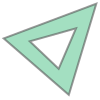

In [36]:
polygon_with_hole # displays the geometry object within the notebook

Note the double brackets in the `holes` keyword argument:

```python
holes=[[(-6.684, 55.168), (-6.704, 55.187), (-6.672, 55.196)]]
```

This is necessary, because `holes` is expecting a sequence of coordinate sequences - effectively, a list of **Polygon** shells.

Accessing the coordinates of a **Polygon** object is a little more complicated than it is for **Point** and **LineString** objects - this is because **Polygon** objects have two sets of coordinates, the `.exterior` (*shell*) and `.interiors` (*holes*). 

But, the `.exterior` attribute of the **Polygon** is just a **LinearRing** (a special case of **LineString** where the first and last coordinates are the same), and the `.interiors` attribute is an **InteriorRingSequence** (basically, a collection of **LinearRing**s that have to obey [additional rules](https://shapely.readthedocs.io/en/stable/manual.html#polygons)):

In [37]:
print(polygon_with_hole.exterior) # this is a single LinearRing
for lr in polygon_with_hole.interiors: # this is potentially multiple LinearRing objects
    print(lr)

LINEARRING (-6.677 55.15, -6.658 55.213, -6.722 55.189, -6.677 55.15)
LINEARRING (-6.684 55.168, -6.704 55.187, -6.672 55.196, -6.684 55.168)


**Polygon** objects have nonzero `.area` and non-zero `.length` (perimeter) attributes - as with the equivalent attributes for **Point** and **LineString** objects, these are *unitless*.

**Polygon** objects also have a `.centroid` (center), and we can bound the geometry using *either* the minimum bounding box parallel to the coordinate axes (the `.envelope` attribute), or a rotated minimum bounding box (the `.minimum_rotated_rectangle` attribute):

In [38]:
print('perimeter: ', poly1.length) # print the perimeter
print('area: ', poly1.area) # print the area
print('centroid: ', poly1.centroid) # get the centerpoint of the rectangle
print('bounding coordinates: ', poly1.bounds) # get the minimum x, minimum y, maximum x, maximum y coordinates
print('bounding box: ', poly1.envelope) # get the minimum bounding rectangle of the polygon, parallel to the coordinate axes
print('rotated bounding box: ', poly1.minimum_rotated_rectangle) # get the smallest possible rectangle that covers the polygon

perimeter:  0.1937030651918303
area:  0.0017880000000000786
centroid:  POINT (-6.685666666666668 55.184000000000005)
bounding coordinates:  (-6.722, 55.15, -6.658, 55.213)
bounding box:  POLYGON ((-6.722 55.15, -6.658 55.15, -6.658 55.213, -6.722 55.213, -6.722 55.15))
rotated bounding box:  POLYGON ((-6.677 55.15, -6.722 55.189, -6.682670050761504 55.234380710659956, -6.637670050761501 55.195380710659954, -6.677 55.15))


There are a number of additional methods that we will cover more as we continue through the practicals - for now, this should be enough to give an idea for how these geometry objects work.

## interactions between geometry objects
`shapely` also provides a number of methods that we can use to check the spatial relationship between different objects. For example, the following code shows how we can use the `.contains()` method ([documentation](https://shapely.readthedocs.io/en/stable/manual.html#object.contains)) of a shapely geometry object to see whether another geometry object is located fully within the object:

In [ ]:
poly = Polygon([(0, 0), (2, 0), (2, 3), (0, 3)])
pt1 = Point(0, -0.1)
pt2 = Point(1, 1)

print(poly.contains(pt1)) # should return False, because pt1 is not within the polygon
print(poly.contains(pt2)) # should return True, because pt2 is within the polygon

We can also check to see whether two geometry objects intersect each other using the `.intersects()` method ([documentation](https://shapely.readthedocs.io/en/stable/manual.html#object.intersects)):

In [ ]:
line1 = LineString([(0, 0), (1, 1)])
line2 = LineString([(0, 1), (1, 0)])

print(line1.intersects(line2)) # intersects() returns True if the geometries touch/intersect/overlap, False otherwise

To actually get the intersection of the two geometries, we use the `.intersection()` method, which returns the geometry of the intersection (whether this is a **Point**, a **LineString**, a **Polygon**, or a mixed collection of geometries depends on the geometries and how they intersect): 

In [ ]:
line1 = LineString([(0, 0), (1, 1)])
line2 = LineString([(0, 1), (1, 0)])
poly = Polygon([(0, 0), (2, 0), (2, 3), (0, 3)])

print(line1.intersection(line2)) # if the lines intersect, this will be the Point(s) of intersection
print(line1.intersection(poly)) # if the line intersects a polygon, the result may be a line or a point

There are a number of other methods provided by `shapely` that we can use to determine the relationship between geometry objects, including `touches`, `within`, and `overlaps`. Be sure to have a look at the full list from the [shapely user manual](https://shapely.readthedocs.io/en/stable/manual.html) to see the rest.

## geopandas GeoDataFrames

We have used `geopandas` in the previous two practicals to read provided shapefiles and work with the data they contain - in Practical 1, we translated a comma-separated variable (CSV) file into a shapefile, and in Practical 2, we read shapefile data and plotted it on a map using `cartopy`.

This week, we will extend this introduction to look at how we can use `geopandas` to do various GIS analyses, such as spatial joins and clipping operations, as well as projecting from one coordinate reference system to another.

To begin, we'll load the **NI_roads** dataset from the data_files folder and use `.head()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)) to show the first 5 rows of the **GeoDataFrame**:

In [ ]:
roads = gpd.read_file('data_files/NI_roads.shp')

roads.head() # show the first five rows of the table

So this dataset has three columns: **SURVEY**, **Road_class**, and **geometry**. 

Note that each of the geometries is a **LineString** object, which means that we are working with line geometries. Hopefully, given that the data are supposed to represent roads, this makes sense.

### coordinate reference systems using PROJ

To start with, let's see if we can figure out how many kilometers of motorway are represented in the dataset - i.e., the sum of the length of all of the **LineString** objects that have the attribute `MOTORWAY`. 

First, though, let's check what the coordinate reference system (CRS) of our **GeoDataFrame** is, using the `crs` attribute:

In [ ]:
roads.crs

So this dataset has a *Geographic* coordinate reference system, **EPSG:4326**. EPSG codes (originally organized by the European Petroleum Survey Group) are a common way of working with coordinate reference systems. Each CRS in the [EPSG registry](https://epsg.org/home.html) has a unique code and standard well-known text representation.

The `crs` attribute of the **GeoDataFrame** is actually a **pyproj.CRS** object ([documentation](https://pyproj4.github.io/pyproj/stable/api/crs/crs.html)). [pyproj](https://pyproj4.github.io/pyproj/stable/) is a python interface to the [PROJ](https://proj.org/) library, which is a software for transforming geospatial coordinates from one CRS to another.

Each **pyproj.CRS** object provides a number of methods for converting to different formats, including well-known text, EPSG codes, JavaScript Object Notation (JSON), and PROJ string (i.e., `'+proj=longlat +datum=WGS84 +no_defs +type=crs'`).

For example, to see the JSON representation of the CRS, we would use the `.to_json()` method ([documentation](https://pyproj4.github.io/pyproj/stable/api/crs/crs.html#pyproj.crs.CRS.to_json)):

In [ ]:
roads.crs.to_json() # show the representation of the CRS in JSON format

Because this is a _Geographic_ CRS, the length information provided by `.length` will also be in geographic units, which doesn't really make sense for us. This means that we first have to convert the **GeoDataFrame** to a *projected* CRS. 

To do this, we can use the method `to_crs()` ([documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html)):

In [ ]:
help(roads.to_crs) # show the help for the .to_crs() method

So, to transform the **GeoDataFrame** to a different CRS, we have to provide either a CRS object or an EPSG code. We can also choose to do this *in place* (`inplace=True`), or assign the output to a new **GeoDataFrame** object (`inplace=False`, the default). Let's transform the **GeoDataFrame** to the Irish Transverse Mercator CRS, and assign the output to a new object called **roads_itm**.

Rather than trying to find the correct JSON or PROJ representation of this CRS, we can instead use the EPSG code, which can be easier to work with.

<span style="color:#009fdf;font-size:1.1em;font-weight:bold">Using the search function on the [EPSG registry](https://epsg.org/search/by-name), or using an internet search, look up the EPSG code for the Irish Transverse Mercator CRS and enter it in the method call below:</span>

In [ ]:
roads_itm = roads.to_crs(epsg=XX) # replace XX with the correct EPSG code for Irish Transverse Mercator

roads_itm.head()

Note that only the **geometry** column has changed - instead of geographic coordinates (e.g., (-6.21243, 54.48706)), the points in each **LineString** should be in a projected CRS (e.g., (715821.764, 861315.722)). Now, when we access the `.length` attributes of each **LineString** object, the units will be in the same units as our CRS (meters).

### vector operations and summarizing data using geopandas
So that's the first part of our problem solved - our coordinates are in meters, and the lengths will be as well. The next step is to select all of the features that correspond to Motorways and sum the lengths. We saw an example of this in Practical 1 - we can slice the **GeoDataFrame** with a conditional statement (`'Road_class' == 'MOTORWAY'`) to select only those rows where the road type is `MOTORWAY`:

In [ ]:
roads_itm[roads_itm['Road_class'] == 'MOTORWAY']

But first, we might want to add a column to our **GeoDataFrame** that contains the `.length` of each of the features in kilometers.

Now, it is possible to do this using a loop and the `.iterrows()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html)) method - this might look something like this:

```python
for ind, row in roads_itm.iterrows(): # iterate over each row in the GeoDataFrame
    roads_itm.loc[ind, 'Length'] = row['geometry'].length / 1000 # assign the row's geometry length to a new column, Length, by dividing the geometry length by 1000
```

In fact, we will see examples of using both `.iterrows()` and `.itertuples()` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.itertuples.html)) later on.

But, we can also use a **vectorized** operation to achieve the same goal. In computing, a [**vectorized** operation](https://en.wikipedia.org/wiki/Array_programming) is an operation that allows us to work on an entire squence of values (a "vector" or "array"), rather than having to work on individual ("scalar") values within a loop. Oftentimes, this enables us to write clearer code, and depending on the language and the operation, it can even run much faster than an equivalent loop construct.

A number of packages in python, including `pandas` (and, by inheritance, `geopandas`), support vectorized operations. Let's see how this works.

First, we can see that the **geometry** column of our **GeoDataFrame** is an object of type **GeoSeries** ([documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html))

In [ ]:
type(roads_itm['geometry'])

A **GeoSeries** has an attribute, `.length` ([documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.length.html)), which provides the length of each geometry in the **GeoSeries**, in the units of the **GeoSeries**' CRS:

In [ ]:
roads_itm['geometry'].length # show the length of each geometry in the geodataframe

To illustrate how much faster vectorized operations can be, let's compare the `for` loop shown above with a vectorized operation, to see whether there is a speed difference between the two options.

First, we'll wrap each of these operations in a function to make it easier to time the results:

In [ ]:
# wrap the for loop in a function to make it easier to use with %timeit
def iterrate_length(gdf):
    for ind, row in gdf.iterrows():
        row['geometry'].length / 1000

# wrap the vector operation in a function to make it easier to use with %timeit
def vector_length(gdf):
    gdf['geometry'].length / 1000

Next, we'll use the `%timeit` [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) to compare the speed of these different operations. First, we'll use `%timeit` to calculate the average of iterating over the dataframe using `.iterrows()`:

In [ ]:
%timeit iterrate_length(roads_itm)

Next, we'll use `%timeit` to calculate the average of using the equivalent vector operation:

In [ ]:
%timeit vector_length(roads_itm)

My results show that `.iterrows()` took an average of ~400 ms (milliseconds, or 10<sup>-3</sup> seconds) over 7 runs, while the vector operation took an average of ~500 µs (microseconds, or 10<sup>-6</sup> seconds) over 7 runs - a difference of about 3 orders of magnitude. 

Your results may differ slightly, but they should be fairly similar. While the difference between ~400 ms and ~500 µs might not seem like much, it can add up a lot over the course of a program (especially if you're working with large datasets).

Note that it's not always possible to use vectorized operations, and there are cases where it may be less advantageous to use them; most of the time, however, it can help keep your code a bit tidier, and it might mean that your code runs faster.

In the cell below, use a vector operation to write a line of code that adds a `Length` column to the **GeoDataFrame**, calculated as the length of each feature in kilometers:

In [ ]:
# your code goes here!

Finally, we can subset our **GeoDataFrame** to select only `MOTORWAY` features, and sum their length using the `.sum()` method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sum.html)):

In [ ]:
sum_roads = roads_itm['Length'].sum()
sum_motorway = roads_itm[roads_itm['Road_class'] == 'MOTORWAY']['Length'].sum()
print(f'{sum_roads:.2f} total km of roads')
print(f'{sum_motorway:.2f} total km of motorway')

In the cell above, look at the `print` function argument:

```python
print(f'{sum_motorway:.2f} total km of motorway')
```

Here, we are using a "[formatted string literal](https://docs.python.org/3/tutorial/inputoutput.html#tut-f-strings)" (**f-String**) to insert the value of an object, `sum_motorway`, into our `print()` statement. We saw this in the very first exercise in Week 1, but there's something added here: the *format specification*, `:.2f`. Rather than printing the string in an unformatted way (which would contain a lot of extra decimal places), we can tell the `format` method to clean up the output using `:` and a [format specification](https://docs.python.org/3.8/library/string.html#formatspec). In this case, `.2f` tells python to format as a **float** (`f`), with 2 places after the decimal.

Let's say now that we want to find the sum of all of the different road classes in our dataset. We could, of course, repeat the exercise above for each of the different values of **Road_class**. But, `pandas` (and by extension, `geopandas`) provides a nicer way to summarize data based on certain properties: the `.groupby()` method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)). 

`.groupby()` returns an object (a **DataFrameGroupBy** object) that is similar to a **DataFrame**, but that contains information about how the data in the table is grouped; to see different properties of those groups, we can use methods like `.mean()`, `.median()`, `.sum()`, etc., exactly like we can on a **DataFrame**, **GeoDataFrame**, or **Series** object.

If we want to summarize our dataset by `Road_class` and use `.sum()` to find the total length of each type of roadway, then, it would like this:

In [ ]:
roads_itm.groupby(['Road_class'])['Length'].sum()

`.groupby()` returns a **GeoDataFrame**, which we can then index to return a single column, `Length`. As this is a numeric column, we can also use arithmetic on it to divide by a conversion factor, to convert the length from meters to kilometers. The `.groupby()` method is a very useful way to quickly summarize a **DataFrame** (or a **GeoDataFrame** - remember that this is a **child class** of **DataFrame**).

## spatial data operations using geopandas and shapely
Oftentimes in GIS analysis, we want to summarize our data spatially, as well as thematically. In this section, we will be looking at two examples of this kind of analysis: first, using a [spatial join](https://gisgeography.com/spatial-join/), and second, using a clipping operation.

Remember that the `shapely` geometry objects in the **GeoDataFrame** don't have any inherent information about the CRS of the object. This means that in order to perform operations like a spatial join, we have to first ensure that the two **GeoDataFrame** objects have the same CRS. The cell below will load the Counties shapefile in the **data_files** folder, and test whether the CRS of the `counties` **GeoDataFrame** is the same as the CRS of the `roads_itm` **GeoDataFrame**.

<span style="color:#009fdf;font-size:1.1em;font-weight:bold">If, when you first load the shapefile, the test below returns False, write a line of code that will ensure that the test returns True.</span>

In [ ]:
counties = gpd.read_file('data_files/Counties.shp') # load the Counties shapefile
# your line of code might go here.
print(counties.crs == roads_itm.crs) # test if the crs is the same for roads_itm and counties.

Now that the two **GeoDataFrame** objects have the same CRS, we can proceed with the spatial join using `gpd.sjoin()` ([documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html)):

In [ ]:
join = gpd.sjoin(counties, roads_itm, how='inner', lsuffix='left', rsuffix='right') # perform the spatial join
join # show the joined table

Now, we can see that our table has additional columns - we have the unnamed `index`, `COUNTY_ID`, `CountyName`, `Area_SqKM`, `OBJECTID`, and `geometry` from the `counties` **GeoDataFrame**, and `index_right` (because the original column in `roads_itm` has the same name as `index` in `counties`), `SURVEY`, `Road_class`, and `Length` from the `roads_itm` **GeoDataFrame**.

Like we did with `roads_itm`, we can again summarize our new **GeoDataFrame** using `.groupby()`; this time, we'll use both the `CountyName` and `Road_class` properties to see the total length of roads by each county, and by the type of road:

In [ ]:
group_county_road = join.groupby(['CountyName', 'Road_class']) # group by county name, then road class

group_county_road['Length'].sum() # show the total number of km for each category

From this, we can quickly see that County Antrim has the most motorway of any county in Northern Ireland (93.44 km), while County Tyrone has the most "< 4M Tarred" road surfaces by a factor of two (2809.43 km vs. 1453.77 km for County Armagh).

One thing to keep in mind is that with a spatial join, any feature in the "right" table that overlaps multiple features in the "left" table will be, in effect, double-counted. We can confirm this by calculating the total length of roads in the joined table and comparing it to the total length of roads in the original dataset:

In [ ]:
join_total = join['Length'].sum() # find the total length of roads in the join GeoDataFrame

# check that the total length of roads is the same between both GeoDataFrames
print(f'Total length of roads from original file: {sum_roads:.2f}')
print(f'Total length of roads from spatial join: {join_total:.2f}')
print(f'Absolute difference in road length: {abs(sum_roads - join_total):0.2f} km') # calculate the absolute difference as a percentage
print(f'Absolute difference in road length: {(100 * abs(sum_roads - join_total) / sum_roads):0.2f}%') # calculate the absolute difference as a percentage

And indeed, we can see that the total length of roads in the spatial join is ~300 km longer (1.42%) than the total length of roads in the original dataset.

We can also see that we have double-counted features by comparing the total number of road features in the `join` **GeoDataFrame** with the number of unique road features, which we can find using a combination of `len()` ([documentation](https://docs.python.org/3/library/functions.html#len)) and `.unique()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)):

In [ ]:
not_unique = len(join.index) - len(join.index_right.unique()) # get the difference between the number of objects in the table and the unique objects in the table

print(f'There are {not_unique} duplicated objects in the joined table.')

Obviously, we don't want to double-count roads - to get around this, we can use the `gpd.clip()` function ([documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.clip.html)) to clip the features of `roads_itm` to each of the county boundaries in the `counties` **GeoDataFrame**:

In [ ]:
help(gpd.clip)

Note that we have to do this for each of county, because - `gpd.clip()` will take the total boundary for the **GeoDataFrame** if there are multiple **Polygon** objects. 

Using a `for` loop to loop over the `counties` **GeoDataFrame**, then, we can clip `roads_itm` to each county:

In [ ]:
clipped = [] # initialize an empty list
for county in counties['CountyName'].unique(): # iterate over unique values of county
    tmp_clip = gpd.clip(roads_itm, counties[counties['CountyName'] == county]) # clip the roads by county border
    tmp_clip['Length'] = tmp_clip['geometry'].length / 1000 # remember to update the length for any clipped roads
    tmp_clip['CountyName'] = county # set the county name for each road feature    

    clipped.append(tmp_clip) # add the clipped GeoDataFrame to the list

Note that this step will likely take some time, as we have to clip a large number of features.

This creates a **list** of **GeoDataFrame** objects - one for each unique value of `CountyName`. Now, we can use `pd.concat()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)) to combine these into a single **DataFrame**, then use `gpd.GeoDataFrame()` to convert this to a **GeoDataFrame**. 

Note the use of `ignore_index=True` with `pd.concat()` - this means that `pandas` will assign each row in the combined **DataFrame** with a new index, rather than keeping the original index. Because in this case our index values only correspond to the row number, we don't need to keep track of this in the new table.

In [ ]:
clipped_gdf = gpd.GeoDataFrame(pd.concat(clipped, ignore_index=True)) # create a geodataframe from the combined county geodataframes

clipped_gdf # show the new, combined geodataframe

Now, we can compare the total length of the clipped roads with the total length of roads from the original dataset:

In [ ]:
# pandas has a function, concat, which will combine (concatenate) a list of DataFrames (or GeoDataFrames)
# we can then create a GeoDataFrame from the combined DataFrame, as the combined DataFrame will have a geometry column.
clip_total = clipped_gdf['Length'].sum()

print(f'Total length of roads from original file: {sum_roads:.2f} m')
print(f'Total length of roads from clipped join: {clip_total:.2f} m')
print(f'Absolute difference in road length: {abs(sum_roads - clip_total):0.2f} km')
print(f'Absolute difference in road length: {(100 * abs(sum_roads - clip_total) / sum_roads):0.2f}%')

So we don't have perfect overlap. This is because there isn't perfect overlap between the `counties` boundary and the `roads` features: there are a number of places where the roads extend beyond the border of Northern Ireland. One example of this is shown below:

![](road_extension.png)

To fix this, we could first clip `roads_itm` to the entire `counties` __GeoDataFrame__, which would eliminate these extraneous stretches of road. 

For now, though, agrement to within 0.01% is acceptable for our purposes - much better than the 1.42% disagreement from the original spatial join.

<span style="color:#009fdf;font-size:1.1em;font-weight:bold">To wrap up, write a line or two of code in the cell below that will summarize the `clipped_gdf` __GeoDataFrame__ by county and road type. Which county has the most Motorways? The most roads in total?</span>

In [ ]:
# your code goes here!

## exercise and next steps
Now that you've gained some experience working with `shapely` geometry objects and `geopandas` **GeoDataFrame** objects, have a look at **exercise_script.py** in this folder. 

Using the topics covered in the Week 2 practical and this practical, modify this script to do the following:
1. Load the counties and ward data
2. Using a spatial join, summarize the total population by county. What county has the highest population? What about the lowest? Note that there are many wards that extend over county boundaries; for the purposes of this exercise, let's ignore that small problem.
3. Create a map like the one below to show population information by census area, with the county boundaries plotted overtop of the chloropleth map. Note that you may need to re-use some of the code from the Week 2 cartopy exercise in order to do this.

![](sample_map.png)

### additional exercise questions
1. Are there any Wards that are located in more than one county? If so, how many, and what is the total population of these Wards?
2. What Ward has the highest population? What about the lowest population?
3. Repeat the exercise above using **exercise_script.py**, but this time use the population density (in number of residents per square km).